### Loading the IMDB dataset

Two-class classification of movie reviews as positive or negative, based on the text content of the reviews

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl

from tensorflow.keras.datasets import imdb
from tensorflow.keras import models
from tensorflow.keras import layers

mpl.rcParams['figure.dpi'] = 125
sns.set_style('darkgrid')

In [2]:
# The top 10,000 most frequently ocurring words in the training data
# The train dataset are list of reviews. Each review is a list of word indices
# The test datasets are list of 0s and 1s (negative and positive)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/home/ricardo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/ricardo/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is depr

In [3]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [4]:
# Printing first sample of training data
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print(train_labels)

[1 0 0 ... 0 1 0]


In [6]:
# No word index will exceed 10,000
print(max([max(sequence) for sequence in train_data]))

9999


### Decode back to English

In [7]:
# Dictionary mapping words to an integer index.
word_indx_dict = imdb.get_word_index() # {'fawn': 34701...}

In [8]:
# Mapping integers indices to words.
reverse_word_index = dict([
    (value, key) for (key, value) in word_indx_dict.items()
]) # {34701: 'fawn'...}

In [9]:
# offset by three becuase reserved indices
decoded_review = ' '.join(reverse_word_index.get(i-3, '?') for i in train_data[0])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

###  Preparing the data

#### Encoding the integer sequences into a binary matrix

In [10]:
def vectorized_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
#     print(results.shape)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [11]:
# Vectorized training data
x_train = vectorized_sequences(train_data)

# Vectorized test data
x_test = vectorized_sequences(test_data)

In [12]:
x_train

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [13]:
# Vectorize labels 
y_train = np.asarray(train_labels).astype('float32').reshape(-1, 1)
y_test = np.asarray(test_labels).astype('float32').reshape(-1, 1)

In [14]:
y_train

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]], dtype=float32)

### Building Network

In [15]:
model = models.Sequential()
model.add(layers.Dense(units=16,
                       activation='relu',
                       input_shape=(10000,)))

model.add(layers.Dense(units=16,
                       activation='relu',))

model.add(layers.Dense(units=1,
                       activation='sigmoid'))

### Compiling the model

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### Setting aside a validation set

In [17]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Train the model for 20 _epochs_, in _mini-batches_ of 512 samples.

### Training your model

In [18]:
partial_x_train.shape

(15000, 10000)

In [19]:
partial_y_train.shape

(15000, 1)

In [20]:
x_val.shape, y_val.shape

((10000, 10000), (10000, 1))

In [21]:
EPOCHS = 20
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=EPOCHS,
                    batch_size=512,
                    verbose=0,
                    validation_data=(x_val, y_val))

In [22]:
history_dict = history.history

In [23]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
history_df = pd.DataFrame(history_dict)

### Plotting the training and validation loss

In [25]:
history_df['epochs'] = range(1, EPOCHS + 1)
history_df

,loss,accuracy,val_loss,val_accuracy,epochs
0,0.527494,0.776933,0.435706,0.8367,1
1,0.322372,0.900067,0.316783,0.8843,2
2,0.234458,0.928533,0.293234,0.8839,3
3,0.186324,0.941133,0.286681,0.8847,4
4,0.150573,0.953533,0.277592,0.8897,5
5,0.125968,0.962400,0.290734,0.8883,6
6,0.103759,0.970800,0.312156,0.8842,7
7,0.084929,0.979000,0.332193,0.8836,8
8,0.073288,0.979200,0.353911,0.8813,9
9,0.057236,0.986867,0.374253,0.8744,10


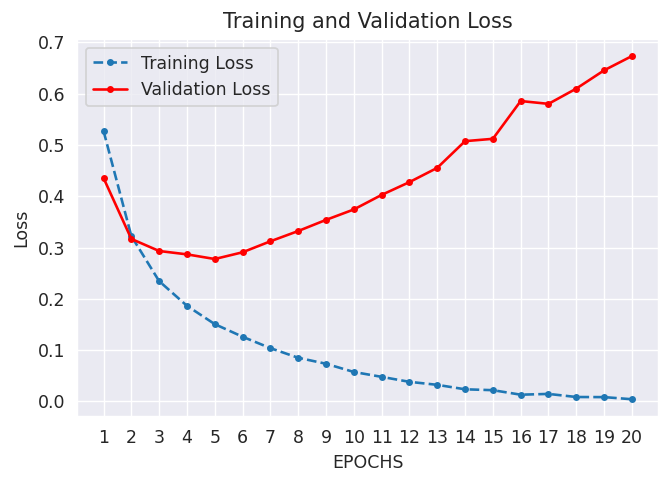

In [26]:
plt.plot(history_df['epochs'], 
         history_df['loss'],
         linestyle='--',
         marker='.',
         label='Training Loss')

plt.plot(history_df['epochs'], 
         history_df['val_loss'],
         linestyle='-', c='r',
         marker='.',
         label='Validation Loss')

plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('Loss')
plt.xticks(range(1, EPOCHS + 1))
plt.title('Training and Validation Loss')
plt.show()

## Plotting the training and validation accuracy

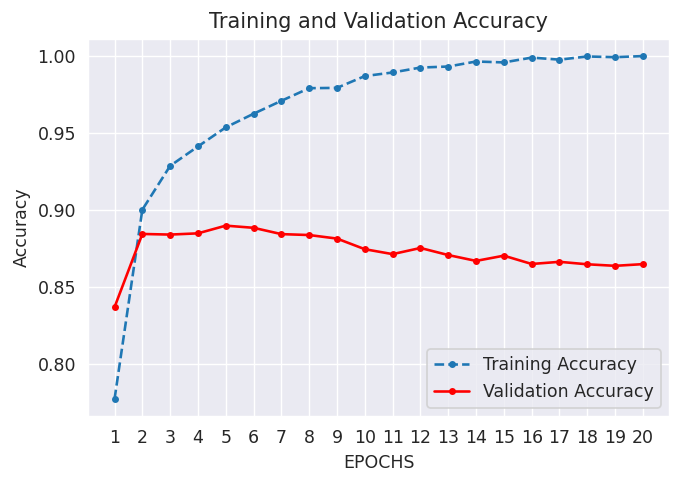

In [27]:
plt.clf()

plt.plot(history_df['epochs'], 
         history_df['accuracy'],
         linestyle='--',
         marker='.',
         label='Training Accuracy')

plt.plot(history_df['epochs'], 
         history_df['val_accuracy'],
         linestyle='-', c='r',
         marker='.',
         label='Validation Accuracy')

plt.legend()
plt.xlabel('EPOCHS')
plt.ylabel('Accuracy')
plt.xticks(range(1, EPOCHS + 1))
plt.title('Training and Validation Accuracy')
plt.show()

### We can see that we are overoptimizing on the training data. In other words, we are __overfitting__.

- To prevent _overfitting_ we could stop training after the third or fourth epoch.

## Retraining model 

In [32]:
model = models.Sequential()

model.add(layers.Dense(16, activation='relu',
                       input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=4,
          batch_size=512)

results_dict=model.evaluate(x_test, y_test, return_dict=True)

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.5813 - accuracy: 0.7400
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2042 - accuracy: 0.9249
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1414 - accuracy: 0.9541
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8703


In [33]:
results_dict

{'loss': 0.39891862869262695, 'accuracy': 0.8703200221061707}

In [34]:
print('Loss:\t', results_dict.get('loss'))
print('Accuracy:', results_dict.get('accuracy'))

Loss:	 0.39891862869262695
Accuracy: 0.8703200221061707


### Using a trained network to generate predictions on new data

In [35]:
model.predict(x_test)

array([[0.07348417],
       [0.9999988 ],
       [0.5190495 ],
       ...,
       [0.07433342],
       [0.04769901],
       [0.8515359 ]], dtype=float32)

As you can see, the network is confident with some samples but less confident for others. We achieved a los of 0.40 and an accuracy of 88%.